# Predicting Outcomes of Myocardial Infarction (MI)

This dataset comes from the UCI Machine Learning Repository called the Myocardial infarction complications data set. My interest in this dataset originates from the research I performed in the first three years of my Ph.D at Duke University.  I studied cardiac tissue engineering where I differentiated human induced pluripotent stem cells into cardiomyocytes and embedded them into a hydrogel to form a contractile cardiac tissue that can be implanted on the epicardium to facilitate recovery from myocardial infarction.  As a result, I was curious if I could use my new skills in machine learning algorithms to analyze this dataset to predict whether a patient will die.  The dataset contains medical information from patients prior to hospital admission and during the first three days at the hospital.  My goal is to develop a ML algorithm using the 112 features to predict whether a patient will die.

In [83]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



In [84]:
address = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data'
df = pd.read_csv(address)
df.head()

,1,77,1.1,2,1.2,1.3,2.1,?,3,0,...,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90
0,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
2,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
3,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
4,6,64,1,0,1,2,1,?,0,0,...,0,0,0,0,0,0,0,0,0,0


The columns have bizarre names so I will change their names based on the information listed for each feature on the UCI Machine Learning Repository website.

In [85]:
col_names = pd.Series([
    'ID',
    'AGE',
    'SEX',
    'INF_ANAM',
    'STENOK_AN',
    'FK_STENOK',
    'IBS_POST',
    'IBS_NASL',
    'GB',
    'SIM_GIPERT',
    'DLIT_AG',
    'ZSN_A',
    'nr11',
    'nr01',
    'nr02',
    'nr03',
    'nr04',
    'nr07',
    'nr08',
    'np01',
    'np04',
    'np05',
    'np07',
    'np08',
    'np09',
    'np10',
    'endocr_01',
    'endocr_02',
    'endocr_03',
    'zab_leg_01',
    'zab_leg_02',
    'zab_leg_03',
    'zab_leg_04',
    'zab_leg_06',
    'S_AD_KBRIG',
    'D_AD_KBRIG',
    'S_AD_ORIT',
    'D_AD_ORIT',
    'O_L_POST',
    'K_SH_POST',
    'MP_TP_POST',
    'SVT_POST',
    'GT_POST',
    'FIB_G_POST',
    'ant_im',
    'lat_im',
    'inf_im',
    'post_im',
    'IM_PG_P',
    'ritm_ecg_p_01',
    'ritm_ecg_p_02',
    'ritm_ecg_p_04',
    'ritm_ecg_p_06',
    'ritm_ecg_p_07',
    'ritm_ecg_p_08',
    'n_r_ecg_p_01',
    'n_r_ecg_p_02',
    'n_r_ecg_p_03',
    'n_r_ecg_p_04',
    'n_r_ecg_p_05',
    'n_r_ecg_p_06',
    'n_r_ecg_p_08',
    'n_r_ecg_p_09',
    'n_r_ecg_p_10',
    'n_p_ecg_p_01',
    'n_p_ecg_p_03',
    'n_p_ecg_p_04',
    'n_p_ecg_p_05',
    'n_p_ecg_p_06',
    'n_p_ecg_p_07',
    'n_p_ecg_p_08',
    'n_p_ecg_p_09',
    'n_p_ecg_p_10',
    'n_p_ecg_p_11',
    'n_p_ecg_p_12',
    'fibr_ter_01',
    'fibr_ter_02',
    'fibr_ter_03',
    'fibr_ter_05',
    'fibr_ter_06',
    'fibr_ter_07',
    'fibr_ter_08',
    'GIPO_K',
    'K_BLOOD',
    'GIPER_Na',
    'Na_BLOOD',
    'ALT_BLOOD',
    'AST_BLOOD',
    'KFK_BLOOD',
    'L_BLOOD',
    'ROE',
    'TIME_B_S',
    'R_AB_1_n',
    'R_AB_2_n',
    'R_AB_3_n',
    'NA_KB',
    'NOT_NA_KB',
    'LID_KB',
    'NITR_S',
    'NA_R_1_n',
    'NA_R_2_n',
    'NA_R_3_n',
    'NOT_NA_1_n',
    'NOT_NA_2_n',
    'NOT_NA_3_n',
    'LID_S_n',
    'B_BLOK_S_n',
    'ANT_CA_S_n',
    'GEPAR_S_n',
    'ASP_S_n',
    'TIKL_S_n',
    'TRENT_S_n',
    'FIBR_PREDS',
    'PREDS_TAH',
    'JELUD_TAH',
    'FIBR_JELUD',
    'A_V_BLOK',
    'OTEK_LANC',
    'RAZRIV',
    'DRESSLER',
    'ZSN',
    'REC_IM',
    'P_IM_STEN',
    'LET_IS'
])

df.columns = col_names

# Data Cleaning

Based on looking at the first few rows of the data frame and the information provided on the UCI Machine Learning Repository website, all of the missing data is specified as '?' so I counted the number of times '?' appears in each feature.

In [86]:
df[df=='?'].count().sort_values(ascending=False)[:110]

KFK_BLOOD     1695
IBS_NASL      1627
S_AD_KBRIG    1075
D_AD_KBRIG    1075
NOT_NA_KB      685
              ... 
zab_leg_04       7
zab_leg_06       7
NA_R_1_n         5
INF_ANAM         4
IM_PG_P          1
Length: 110, dtype: int64

KFK_BLOOD, IBS_NASL, S_AD_KBRIG, D_AD_KBRIG, NOT_NA_KB, LID_KB, and NA_KB are missing signficant data so I will drop these features.

In [87]:
MI_df = df.drop(columns=['KFK_BLOOD','IBS_NASL','S_AD_KBRIG','D_AD_KBRIG',
                        'NOT_NA_KB','LID_KB','NA_KB'], axis=1)

Convert all data types to floats to be able to calculate statistics, such as mean, median, etc.

In [88]:
MI_df = MI_df.replace(to_replace='?',value=np.nan)
MI_df = MI_df.astype('float32')

One method to fix missing values is to impute the value based on the rest of the data. To start, I will identify features where the most common value occurs over 75% of the time.  In this case, I will guess that missing values in these columns are the value that occurs over 75% of the time.

In [89]:
# identify which columns have missing values
Cols_missing = MI_df.isnull().sum().sort_values(ascending=False)
Cols_missing = Cols_missing[Cols_missing != 0]

Col_common = []
Col_common_max_value = []
for i in range(len(Cols_missing)):
    if max(MI_df[Cols_missing.index[i]].value_counts())/MI_df[Cols_missing.index[i]].value_counts().sum()>0.75:
        Col_common.append(Cols_missing.index[i])
        Col_common_max_value.append(max(MI_df[Cols_missing.index[i]])) 

# replace nan with most common value if that value occurs more than 75% of the time
for i in range(len(Col_common)):
    MI_df[Col_common[i]].replace(np.nan,Col_common_max_value[i],inplace=True)

In [90]:
# Identify which columns still have missing values
Cols_missing = MI_df.isnull().sum().sort_values(ascending=False)
Cols_missing = Cols_missing[Cols_missing != 0]
Cols_missing

Na_BLOOD         375
K_BLOOD          371
GIPO_K           369
AST_BLOOD        284
ALT_BLOOD        283
S_AD_ORIT        267
D_AD_ORIT        267
DLIT_AG          248
ROE              203
ritm_ecg_p_01    152
TIME_B_S         126
L_BLOOD          125
STENOK_AN        106
ant_im            83
inf_im            80
lat_im            80
FK_STENOK         73
IBS_POST          51
ASP_S_n           17
GEPAR_S_n         17
ANT_CA_S_n        13
NOT_NA_1_n        10
LID_S_n           10
GB                 9
AGE                8
NA_R_1_n           5
INF_ANAM           4
dtype: int64

For colums with numeric data, I will impute missing values as the median of the feature.  To do this, I will determine which columns are numeric vs. categorical based on the number of unique values in each column.

In [91]:
# separate columns with missing data into numeric vs. categorical
Cols_num_missing = []
Cols_cat_missing = []
for i in range(len(Cols_missing)):
    if len(MI_df[Cols_missing.index[i]].unique()) > 10:
        Cols_num_missing.append(Cols_missing.index[i])
    else:
        Cols_cat_missing.append(Cols_missing.index[i])

In [92]:
# create a function that replaces missing values in columns with numeric data with the median of the available data
def use_numeric_average(columns):
    for i in range(len(columns)):
        avg = MI_df[columns[i]].median()
        MI_df[columns[i]].replace(np.nan,avg,inplace=True)

# Try replacing missing values of numeric data with median of available data
use_numeric_average(Cols_num_missing)

I still need to determine a solution for missing values in the columns containing categorical data. According to the UCI Machine Learning Repository website for this dataset, ritm_ecg_p_01, ritm_ecg_p_07, and ritm_ecg_p_08 are mutually exclusive, i.e. all of these values represent ECG at the time of admission with varying heart rates. ritm_ecg_p_01 has a heart rate of 60-90 bpm. ritm_ecg_p_07 has a heart rate greater than 90 bpm while ritm_ecg_p_08 has a heart rate lower than 60 bpm.  Since I have all of the data for ritm_ecg_p_07 and ritm_ecg_p_08, I can use those columns to determine values for ritm_ecg_p_01.

In [93]:
# Estimate ritm_ecg_p_01 based on ritm_ecg_p_07 and ritm_ecg_p_08 
# ritm_ecg_p_01 must be 0 if either ritm_ecg_p_07 or ritm_ecg_p_08 is 1, and ritm_ecg_p_01 must be 1 they are both 0
mask_01_null = MI_df['ritm_ecg_p_01'].isnull()
mask_07 = MI_df['ritm_ecg_p_07'] == 0
mask_08 = MI_df['ritm_ecg_p_08'] == 0

MI_df['ritm_ecg_p_01'] = np.where(mask_01_null & mask_07 & mask_08, 1, MI_df.ritm_ecg_p_01)
mask_null = MI_df['ritm_ecg_p_01'].isnull()
MI_df['ritm_ecg_p_01'] = np.where(mask_null, 0, MI_df.ritm_ecg_p_01)

For the remaining features containing missing values, I use various strategies that make the most sense for each feature.

In [94]:
# INF_ANAM - only 4 missing values and majority of values are 0
MI_df['INF_ANAM'].replace(np.nan,0,inplace=True)

# NA_R_1_n/NA_R_2_n represent how many opioids were used in the first/second day at the hospital
# Patients with high opioid use on day 2 likely had high use on day 1
# Since there is no missing data for NA_R_2_n, I will guess NA_R_1_n to have the same value as NA_R_2_n
MI_df['NA_R_1_n'] = np.where(MI_df['NA_R_1_n'].isnull(), MI_df.NA_R_2_n, MI_df.NA_R_1_n)

# LID_S_n - over 70% are 0 so set missing values to 0
MI_df['LID_S_n'].replace(np.nan,0,inplace=True)

# NOT_NA_1_n - over 70% are 0 so set missing values to 0
MI_df['NOT_NA_1_n'].replace(np.nan,0,inplace=True)

# ANT_CA_S_n - over 65% are 1 so set missing values to 1
MI_df['ANT_CA_S_n'].replace(np.nan,1,inplace=True)

# ASP_S_n - over 70% are 1 so set missing values to 1
MI_df['ASP_S_n'].replace(np.nan,1,inplace=True)

# GEPAR_S_n - over 70% are 1 so set missing values to 1
MI_df['GEPAR_S_n'].replace(np.nan,1,inplace=True)

# The following features represent the presence of myocardial infarction on ECG
# Since the values are missing, the hospital likely did not need to perform the test 
# Therefore, the value is likely 0 (no myocardial infarction on ECG)
MI_df['ant_im'].replace(np.nan,0,inplace=True)
MI_df['lat_im'].replace(np.nan,0,inplace=True)
MI_df['inf_im'].replace(np.nan,0,inplace=True)

# GIPO_K refers to the presence of hypokalemia, or low levels of potassium in the plasma
# K_BLOOD, which does not have missing data, is the level of potassium in the plasma
# Hypokalemia occurs with at a plasma concentration below 4 mmol/L
# Therefore, I can use the known K_BLOOD levels to determine missing values of GIPO_K
mask_null = MI_df['GIPO_K'].isnull()
mask_KBLOOD1 = MI_df['K_BLOOD']<4
mask_KBLOOD2 = MI_df['K_BLOOD']>=4
MI_df['GIPO_K'] = np.where(mask_null & mask_KBLOOD1, 1, MI_df.GIPO_K)
MI_df['GIPO_K'] = np.where(mask_null & mask_KBLOOD2, 0, MI_df.GIPO_K)

# GB - only 9 missing values and majority have value 2
MI_df['GB'].replace(np.nan,2,inplace=True)

# DLIT_AG - represents duration of hypertension - most values are either 0 (no hypertension) or 7 (more than 10 years)
# GB, which does not have missing data, represents the presence of hypertension
# Therefore, for patients with GB=0, DLIT_AG should be 0
# For patients with GB>0, guess DLIT_AG=7, since it is the most common for patients with hypertension
mask_null = MI_df['DLIT_AG'].isnull()
mask_GB1 = MI_df['GB']==0
mask_GB2 = MI_df['GB']>0
MI_df['DLIT_AG'] = np.where(mask_null & mask_GB1, 0, MI_df.DLIT_AG)
MI_df['DLIT_AG'] = np.where(mask_null & mask_GB2, 7, MI_df.DLIT_AG)

# STENOK_AN refers to a patient's history of angina pectoris, which is often associated with myocardial infarction
# INF_ANAM, what has no missing data, refers to a patient's history of myocardial infarction
# Therefore, if INF_ANAM=0 (0 MI), STENOK_AN is most likely 0
# If INF_ANAM>0, STENOK_AN is most commonly a value of 6
mask_null = MI_df['STENOK_AN'].isnull()
mask_INFANAM1 = MI_df['INF_ANAM']==0
mask_INFANAM2 = MI_df['INF_ANAM']>0
MI_df['STENOK_AN'] = np.where(mask_null & mask_INFANAM1, 0, MI_df.DLIT_AG)
MI_df['STENOK_AN'] = np.where(mask_null & mask_INFANAM2, 6, MI_df.DLIT_AG)

# FK_STENOK represents the type of angina pectoris
# Therefore, if a patient has STENOK_AN=0, FK_STENOK should be 0
# If STENOK_AN>0, majority of FK_STENOK are 2
mask_null = MI_df['FK_STENOK'].isnull()
mask_STENOKAN1 = MI_df['STENOK_AN']==0
mask_STENOKAN2 = MI_df['STENOK_AN']>0
MI_df['FK_STENOK'] = np.where(mask_null & mask_STENOKAN1, 0, MI_df.DLIT_AG)
MI_df['FK_STENOK'] = np.where(mask_null & mask_STENOKAN2, 2, MI_df.DLIT_AG)

# IBS_POST - fairly evenly divided among three categories - guess most common category (2)
MI_df['IBS_POST'].replace(np.nan,2,inplace=True)

# TIME_B_S - fairly evenly divided among many categories - guess most common category (2)
MI_df['TIME_B_S'].replace(np.nan,2,inplace=True)

# Separate training and testing data

I am interested in predicting whether a patient dies, which is the column labeled 'LET_IS.' This feature has eight possible values due to different causes of death.  I am only interested in whether a patient dies, so I will convert this category into a binary outcome.

In [95]:
Data_df = MI_df.drop(['ID','FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK',
                      'OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN','LET_IS'],axis=1)

Target_df = MI_df['LET_IS']
mask = Target_df == 0
Target_df = np.where(mask,0,1)

X_train, X_test, y_train, y_test = train_test_split(Data_df,Target_df,test_size=0.2)

# Scale numeric data and one-hot encode categorical data

Before training models on the training data, I need to make sure the numeric data is properly scaled to a mean of 0 and standard deviation of 1. For categorical data, I need to one-hot encode so that the algorithms do not perceive any relationships among the possible values of each category.

In [96]:
Columns_num = []
Columns_cat_one_hot = []
for i in range(len(Data_df.columns)):
    if len(Data_df[Data_df.columns[i]].value_counts()) > 10:
        Columns_num.append(Data_df.columns[i])
    elif len(Data_df[Data_df.columns[i]].value_counts()) > 2:
        Columns_cat_one_hot.append(Data_df.columns[i])
num_attribs = Columns_num
cat_attribs = Columns_cat_one_hot

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])
X_train_prepared = full_pipeline.fit_transform(X_train)

# Train Models

## K-Nearest Neighbors (KNN)

The first model I will test is a K-nearest neighbors supervised learning classifier. I will use 10-fold cross-validation to fit the optimal parameters.

In [37]:
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train_prepared, y_train)
knn_clf.predict(X_train_prepared[24])

X_test_prepared = full_pipeline.transform(X_test)
knn_clf.score(X_test_prepared, y_test)

0.9235294117647059

This resulted in a seemingly high score but this could be due to a high accuracy of negative results with a low accuracy of positive results, so I need to explore this further.  For now, I will use a grid search with cross-validation to see if I can improve the model further.

In [38]:
scores = cross_val_score(knn_clf, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(tree_rmse_scores) 

Scores:  [0.33210558 0.29704426 0.28439823 0.33210558 0.30917347 0.27116307
 0.32084447 0.34299717 0.35355339 0.33333333]
Mean:  0.3176718568190574
Standard Deviation:  0.025236461059974652


In [58]:
param_grid = [
    {'n_neighbors': [3, 5, 10, 20], 'weights': ['uniform','distance'], 'p': [1,2]},
]

clf_knn = KNeighborsClassifier()
grid_search = GridSearchCV(clf_knn, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True) 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [59]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.31867222362185316 {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.31867222362185316 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.3232498249284257 {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.3232498249284257 {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.3081053594542285 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.3081053594542285 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.3151964736756773 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.3151964736756773 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.31636072944540544 {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.31402790146726595 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.32438935971503696 {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
0.32097129831714 {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.3209755249326921 {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
0.3186764807301021 {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.3288956467169285 {'n_neighbors

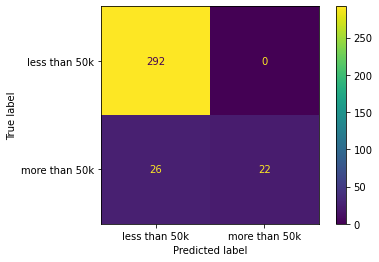

In [60]:
clf_knn = KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform')
clf_knn.fit(X_train_prepared,y_train)
plot_confusion_matrix(clf_knn, X_test_prepared, y_test, values_format='d', display_labels=['less than 50k','more than 50k'])

In [61]:
y_train_pred = cross_val_predict(clf_knn, X_train_prepared, y_train, cv=10)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1136
           1       0.94      0.45      0.61       223

    accuracy                           0.91      1359
   macro avg       0.92      0.72      0.78      1359
weighted avg       0.91      0.91      0.89      1359



After determining the optimal fit with grid search, I used the optimal hyperparameters to fit the data and tested the fit with the test data.  As suggested earlier, the high score is due to extremely accurate predictions of survivors but low accuracy of people that died.  The recall is 0.45 with approximately only half of the people that died correctly classified.

## Random Forest

To see if I can get a more accurate prediction for people that die, I decided to test a random forest algorithm with optimized hyperparameters using a grid search with cross-validation.

In [97]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train_prepared, y_train)
X_test_prepared = full_pipeline.transform(X_test)
clf_forest.score(X_test_prepared, y_test)

0.8941176470588236

In [98]:
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_features': [10, 15, 20]},
    {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [6, 10, 15]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True) 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'max_features': 20, 'n_estimators': 100}

In [99]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2766312590504351 {'max_features': 10, 'n_estimators': 50}
0.27664106710443853 {'max_features': 10, 'n_estimators': 100}
0.277971738471299 {'max_features': 10, 'n_estimators': 150}
0.2726051074467137 {'max_features': 15, 'n_estimators': 50}
0.27125311148148556 {'max_features': 15, 'n_estimators': 100}
0.2699043958434054 {'max_features': 15, 'n_estimators': 150}
0.26988428973522466 {'max_features': 20, 'n_estimators': 50}
0.2643740534032637 {'max_features': 20, 'n_estimators': 100}
0.2712581127834041 {'max_features': 20, 'n_estimators': 150}
0.2779619773708317 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
0.27261506035229927 {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
0.2712481100873525 {'bootstrap': False, 'max_features': 10, 'n_estimators': 50}
0.27396033517378904 {'bootstrap': False, 'max_features': 10, 'n_estimators': 100}
0.2726051074467137 {'bootstrap': False, 'max_features': 15, 'n_estimators': 50}
0.26989936945677906 {'bootstrap': False, 'max_feat

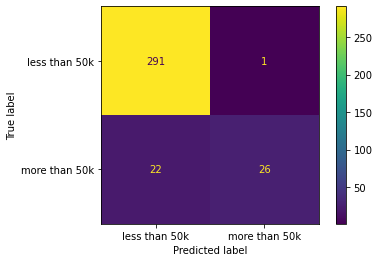

In [43]:
forest_clf = RandomForestClassifier(n_estimators=50, max_features=15,bootstrap=False)
forest_clf.fit(X_train_prepared,y_train)
plot_confusion_matrix(forest_clf, X_test_prepared, y_test, values_format='d', display_labels=['less than 50k','more than 50k'])

In [47]:
y_train_pred = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=10)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1136
           1       0.91      0.55      0.68       223

    accuracy                           0.92      1359
   macro avg       0.91      0.77      0.82      1359
weighted avg       0.92      0.92      0.91      1359



The random forest classifier had similar results as KNN but with a slightly improved recall of 0.55.

## Support Vector Machines (SVM)

Finally, I tested a support vector machine algorithm to see if it could more accuratly predict death than KNN and the random forest classifier.

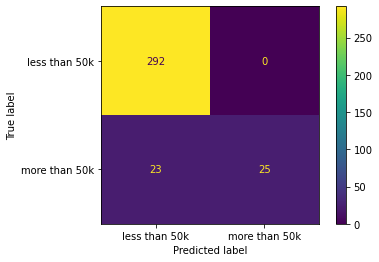

In [30]:
clf_svm = SVC()
clf_svm.fit(X_train_prepared,y_train)

X_test_prepared = full_pipeline.transform(X_test)
plot_confusion_matrix(clf_svm, X_test_prepared, y_test, values_format='d', display_labels=['less than 50k','more than 50k'])

In [31]:
param_grid = [
    {'C': [0.5, 1, 10, 100], 
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     'kernel': ['rbf']},
]

clf_svm = SVC()
grid_search = GridSearchCV(clf_svm, param_grid, cv=5, scoring='accuracy',
                           return_train_score=True) 
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

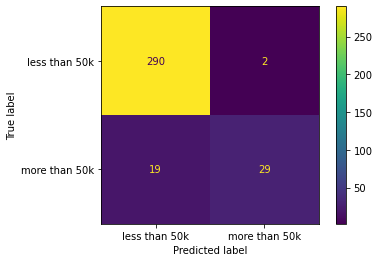

In [32]:
clf_svm = SVC(C=10, gamma=0.01, kernel='rbf')
clf_svm.fit(X_train_prepared,y_train)
plot_confusion_matrix(clf_svm, X_test_prepared, y_test, values_format='d', display_labels=['less than 50k','more than 50k'])

In [33]:
y_train_pred = cross_val_predict(clf_svm, X_train_prepared, y_train, cv=10)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1136
           1       0.91      0.57      0.70       223

    accuracy                           0.92      1359
   macro avg       0.91      0.78      0.83      1359
weighted avg       0.92      0.92      0.91      1359



SVM resulted in a slightly better recall than the other algorithms at 0.57 (compared to 0.55 and 0.45).  Fortunately, the algorithms do a near perfect job predicting negatives.  Therefore, we can improve recall by changing the threshold used to classify predictions.  This will result in a lower precision but improved recall.  In the case of predicting death, it is certainly more important to have a higher recall than precision.  It is ok if the algorithm identifies survivors as people that are likely to die as long as it identifies every person who is at risk for death without further medical intervention.  I will plot the ROC curve to determine an optimal threshold for the algorithm.

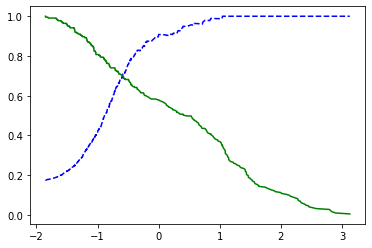

In [51]:
y_scores = cross_val_predict(clf_svm, X_train_prepared, y_train, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 
plt.show()  

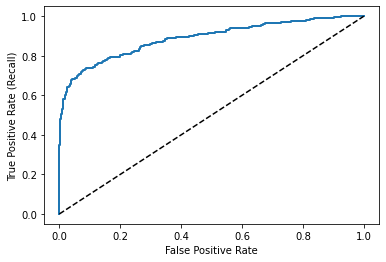

In [36]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
plot_roc_curve(fpr, tpr) 
plt.show() 

The ROC curve shows a fairly accurate model if the threshold is adjusted to a recall of about 0.75 while still maintaining a low false positive rate.

In conclusion, I explored an interesting dataset on myocardial infarction using my medical knowledge from graduate school.  I identified effective methods to remove some missing data and impute other ones based on known data. I used three different supervised learning algorithms that resulted in a low false positive rate and a moderate recall. I discovered from the ROC curve that adjusting the threshold can lead to a significantly more accurate model with a high recall and low fals positive rate.